# Pandas/Enron Notebook

In [57]:
import json
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
%matplotlib inline

msg_matrix = defaultdict(Counter)

with open('../local_data/graph.json', 'r') as infile:
    data = json.load(infile)
    for message in data:
        msg_matrix[message['sender']].update(message['recipients'])

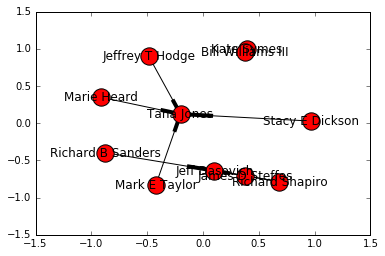

In [159]:
import itertools
import networkx as nx

df = pd.DataFrame(msg_matrix).fillna(0)
scores = df.stack().sort_values(ascending=False).reset_index()
scores.columns = ['sender', 'recipient', 'count']

edges = scores.loc[scores.sender != scores.recipient][['sender', 'recipient', 'count']]
graph = nx.DiGraph()
graph.add_weighted_edges_from(edges.head(10).itertuples(index=False))
nx.draw_networkx(graph)


In [49]:
import itertools


['a', 'b']

## Link Activity Scoring

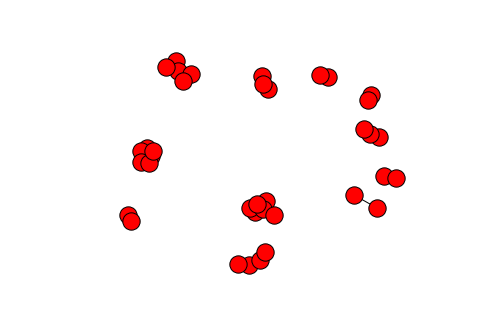

[{'Albert Meyers', 'Bill Williams III', 'Kate Symes'},
 {'James D Steffes',
  'Jeff Dasovich',
  'Mary Hain',
  'Richard B Sanders',
  'Richard Shapiro',
  'Steven J Kean'},
 {'Darron C Giron', 'Eric Bass', 'Matthew Lenhart', 'Phillip M Love'},
 {'Carol St Clair',
  'Marie Heard',
  'Mark E Taylor',
  'Sara Shackleton',
  'Stephanie Panus',
  'Susan Bailey',
  'Tana Jones'},
 {'David W Delainey',
  'John Arnold',
  'John J Lavorato',
  'Kevin M Presto',
  'Louise Kitchen'},
 {'Kimberly Watson', 'Michelle Lokay', 'Steven Harris'},
 {'Rod Hayslett', 'Tracy Geaccone'},
 {'Jeffrey A Shankman', 'Mike McConnell'},
 {'Gerald Nemec', 'Mark Whitt'},
 {'Mike Grigsby', 'Phillip K Allen'},
 {'Lynn Blair', 'Shelley Corman'}]

In [160]:
scoring = (df * df.T).dropna(axis=(0,1), how='all')
scores = scoring.stack().sort_values(ascending=False).reset_index()
scores.columns = ['sender', 'recipient', 'score']
score_edges = scores.loc[scores.sender != scores.recipient][['sender', 'recipient']]
score_graph = nx.DiGraph()

score_graph.add_edges_from(score_edges.head(75).itertuples(index=False))

pos = nx.spring_layout(score_graph)
nx.draw(score_graph, pos)
plt.show()

list(nx.weakly_connected_components(score_graph))


###  plot below (senders, recipients, size=pagerank)

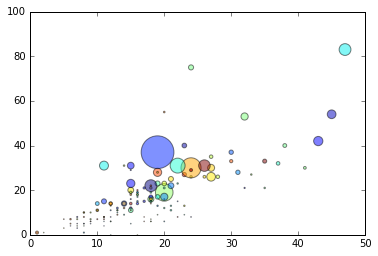

In [55]:
df = pd.DataFrame(msg_matrix).fillna(0)
links = df.stack().sort_values(ascending=False).reset_index()
links.columns = ['sender', 'recipient', 'count']

pr_graph = nx.DiGraph()
pr_graph.add_weighted_edges_from(links.itertuples(index=False))
ranks = nx.pagerank(pr_graph)


scatter = pd.DataFrame({'sender': links.loc[links['count'] > 0].groupby('sender').size(),
                        'recipient': links.loc[links['count'] > 0].groupby('recipient').size(),
                        'ranks': ranks
                       }).fillna(0)

colors = np.random.rand(len(ranks))

plt.scatter(scatter['sender'], scatter['recipient'], s=np.pi * (250*scatter['ranks'])**2, c=colors, alpha=0.5)
plt.xlim(xmin=0)
plt.ylim(ymin=0)

plt.show()




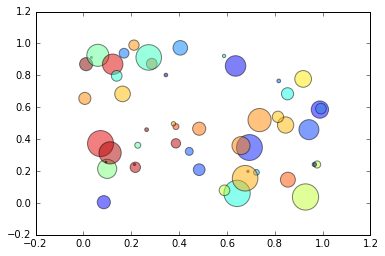

In [30]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

## GoogleMatrix Cluster centres

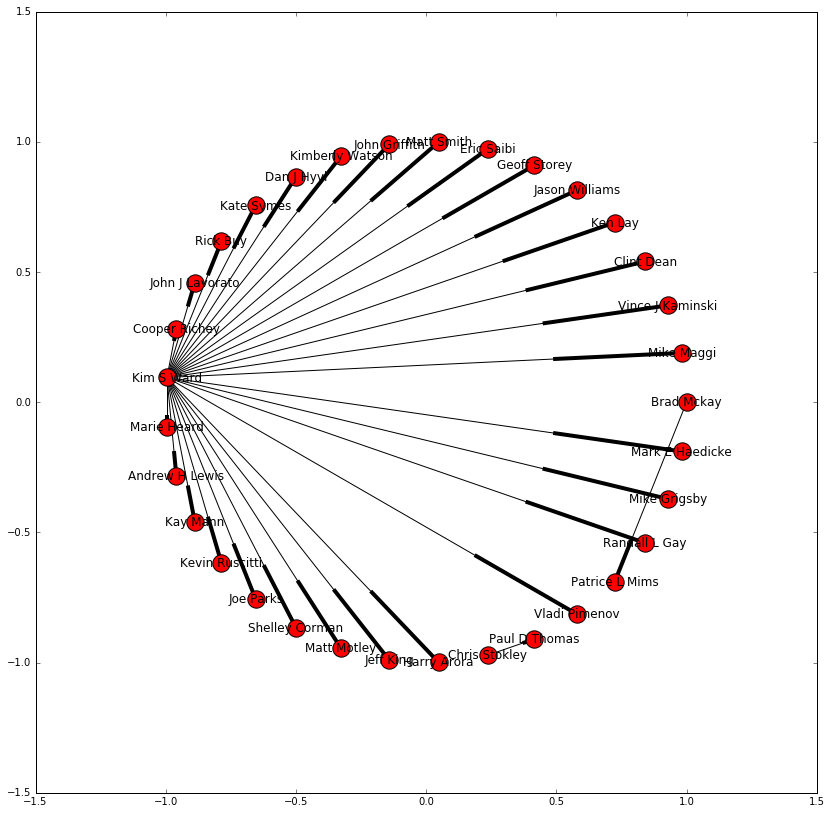

In [187]:

connectivity = df.stack().to_frame().reset_index()
connectivity.columns = ['from', 'to', 'count']
enron = nx.DiGraph()
enron.add_edges_from(connectivity[['from', 'to']].itertuples(index=False))

gscore = pd.DataFrame(nx.google_matrix(enron), columns=enron.nodes(), index=enron.nodes()).stack().to_frame().reset_index()
gscore.columns = ['from', 'to', 'count']

gscore = gscore.loc[gscore['from'] != gscore['to']].sort_values(by='count', ascending=False).reindex()


gedges = gscore.loc[gscore['from'] != gscore['to']][['from', 'to']]
ggraph = nx.DiGraph()
ggraph.add_edges_from(gedges.head(30).itertuples(index=False))
plt.rcParams['figure.figsize'] = (14.0, 14.0)

nx.draw_networkx(ggraph, pos=nx.circular_layout(ggraph))